In [6]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
with open("data/slk_newscrawl_2016_1M/slk_newscrawl_2016_1M-sentences.txt", "r", encoding="utf-8") as f:
    # read lines and split at tab, keep only second column
    slk_df = pd.DataFrame(
        [line.strip().split("\t")[1] for line in f.readlines()], columns=["sentence"]
    )
    display(slk_df.head())

with open("data/tur_news_2024_1M/tur_news_2024_1M-sentences.txt", "r", encoding="utf-8") as f:
    # read lines and split at tab, keep only second column
    tur_df = pd.DataFrame(
        [line.strip().split("\t")[1] for line in f.readlines()], columns=["sentence"]
    )
    display(tur_df.head())

,sentence
0,! 00:01 Nestrapnuj sa krcmovymi frajerinami a ...
1,"007iwb, platený diskuter, ktorý v každej debat..."
2,01:15 - tvoj mozog plný fekálií je schopný iba...
3,"01. apríl 2014, 07:18 Počet obetí zosuvu pôdy ..."
4,"01. apríl 2014, 14:33 Nora Mojsejová na slobode?"


,sentence
0,%0.1 çok düşük çok düşük bir büyüme.
1,"""01 Kasım 2024 tarihinden itibaren geçerli olm..."
2,"""02.04.2024 günü saat 12.47’de Beşiktaş ilçesi..."
3,"""02 Adana Yasin-Poyraz"" firmasının et dönerind..."
4,"‘ 0-4 yaş arası çocuklu annelere, ‘Anne Kart’ ..."


In [8]:
def build_statistics_df(df, lang):
    num_sentences = len(df)
    num_words = df["sentence"].apply(lambda x: len(x.split())).sum()
    num_distinct_words = len(set(word for sentence in df["sentence"] for word in sentence.split()))
    avg_sentence_length_chars = df["sentence"].apply(len).mean()
    avg_sentence_length_words = df["sentence"].apply(lambda x: len(x.split())).mean()

    stats = {
        "Language": lang,
        "Number of sentences": num_sentences,
        "Number of words": num_words,
        "Number of distinct words": num_distinct_words,
        "Average sentence length (words)": avg_sentence_length_words,
        "Average sentence length (characters)": avg_sentence_length_chars,
    }
    return pd.DataFrame([stats])

In [9]:
# build df with most frequent words, bigrams and trigrams
def build_frequent_ngrams_df(df, n=1, top_k=10):
    from collections import Counter
    from nltk import ngrams

    all_ngrams = []
    for sentence in df["sentence"]:
        tokens = sentence.split()
        n_grams = ngrams(tokens, n)
        all_ngrams.extend(n_grams)

    ngram_counts = Counter(all_ngrams)
    most_common_ngrams = ngram_counts.most_common(top_k)

    ngram_list = [' '.join(ngram) for ngram, count in most_common_ngrams]
    counts = [count for ngram, count in most_common_ngrams]

    return pd.DataFrame({
        f'Top {top_k} {" ".join(["word"]*n)}s': ngram_list,
        'Count': counts
    })

In [10]:
for df, lang in [(slk_df, "Slovak"), (tur_df, "Turkish")]:
    statistics = build_statistics_df(df, lang)
    print(f"Statistics for {lang}:")
    display(statistics)
    statistics.to_csv(f"data/out/statistics_{lang.lower()}.csv", index=False)

    for n in [1, 2, 3]:
        frequent_ngrams_df = build_frequent_ngrams_df(df, n=n, top_k=10)
        print(f"Top 10 {n}-grams for {lang}:")
        display(frequent_ngrams_df)
        frequent_ngrams_df.to_csv(f"data/out/frequent_{n}grams_{lang.lower()}.csv", index=False)
        

Statistics for Slovak:


,Language,Number of sentences,Number of words,Number of distinct words,Average sentence length (words),Average sentence length (characters)
0,Slovak,1000000,16210740,1092409,16.21074,107.19337


Top 10 1-grams for Slovak:


,Top 10 words,Count
0,v,343121
1,a,330315
2,na,325468
3,sa,310920
4,je,161956
5,aj,119517
6,že,117498
7,o,107967
8,to,105263
9,s,105125


Top 10 2-grams for Slovak:


,Top 10 word words,Count
0,nie je,15945
1,Prečítajte si,14243
2,si exkluzívne,14140
3,exkluzívne prognózy,14140
4,prognózy TRENDU,14140
5,je to,11603
6,by sa,11487
7,v roku,11347
8,sa v,10721
9,do diskusie,10290


Top 10 3-grams for Slovak:


,Top 10 word word words,Count
0,Prečítajte si exkluzívne,14140
1,si exkluzívne prognózy,14140
2,exkluzívne prognózy TRENDU,14140
3,príspevku do diskusie,10046
4,pridanie príspevku do,10045
5,do diskusie sa,10045
6,diskusie sa musíte,10045
7,sa musíte prihlásiť.,10045
8,Pridaním príspevku súhlasite,2621
9,príspevku súhlasite s,2621


Statistics for Turkish:


,Language,Number of sentences,Number of words,Number of distinct words,Average sentence length (words),Average sentence length (characters)
0,Turkish,1000000,13800632,770150,13.800632,106.358147


Top 10 1-grams for Turkish:


,Top 10 words,Count
0,ve,339696
1,bir,222524
2,bu,92751
3,için,90696
4,ile,75331
5,da,74797
6,de,71173
7,Bu,54183
8,olarak,53521
9,daha,42438


Top 10 2-grams for Turkish:


,Top 10 word words,Count
0,hem de,8095
1,bir şekilde,7953
2,ifadelerini kullandı.,7697
3,büyük bir,7081
4,ya da,6731
5,önemli bir,6656
6,diye konuştu.,6500
7,devam ediyor.,6372
8,ve bu,6173
9,Belediye Başkanı,6010


Top 10 3-grams for Turkish:


,Top 10 word word words,Count
0,sosyal medya hesabından,2631
1,bir kez daha,2551
2,Cumhurbaşkanı Recep Tayyip,2451
3,Büyükşehir Belediye Başkanı,1752
4,"Recep Tayyip Erdoğan,",1436
5,başta olmak üzere,1419
6,ekipleri sevk edildi.,1287
7,Hazine ve Maliye,1256
8,bir araya geldi.,1246
9,Tarım ve Orman,1229


In [11]:
# Plotting Zipf's law
def plot_zipfs_law(df, lang):
    all_words = [word for sentence in df["sentence"] for word in sentence.split()]
    word_counts = Counter(all_words)
    sorted_word_counts = sorted(word_counts.values(), reverse=True)
    ranks = range(1, len(sorted_word_counts) + 1)

    plt.loglog(ranks, sorted_word_counts, marker=".", label=lang)

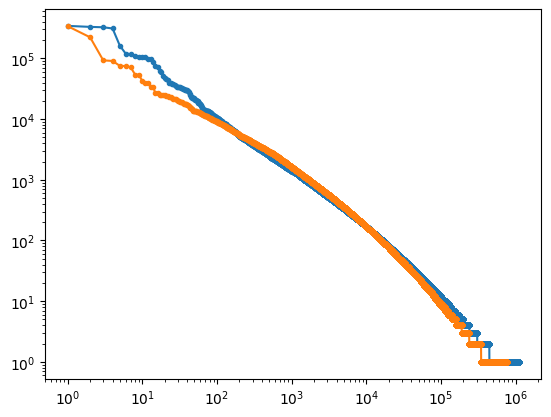

In [12]:
for df, lang in [(slk_df, "Slovak"), (tur_df, "Turkish")]:
    plot_zipfs_law(df, lang)

In [13]:
# compare statistics of the two languages
with open("data/out/statistics_slovak.csv", "r", encoding="utf-8") as f:
    slk_stats = pd.read_csv(f)
with open("data/out/statistics_turkish.csv", "r", encoding="utf-8") as f:
    tur_stats = pd.read_csv(f)

In [14]:
display(slk_stats)

,Language,Number of sentences,Number of words,Number of distinct words,Average sentence length (words),Average sentence length (characters)
0,Slovak,1000000,16210740,1092409,16.21074,107.19337
